## **Задание 1 - Генерация случайных величин с заранее заданной ковариационной матрицей**

In [1]:
import numpy as np

# Ещё будем принимать на вход вектор средних - его всё равно придётся задавать внутри функции

def get_rand_vec(means, sigma):
    A = np.linalg.cholesky(sigma)
    z = np.random.normal(0,1, size=(sigma.shape[0],1))
    return  means + A @ z


In [33]:
mat = np.random.randint(-10,10, size=(5,5))
sigma = mat @ mat.T

means = np.random.randint(0,25, size=(sigma.shape[0],1))

vec = get_rand_vec(means, sigma)

means, sigma, vec

(array([[14],
        [15],
        [15],
        [ 8],
        [13]]),
 array([[ 227,  -70, -162,  -27,  -81],
        [ -70,   92,   37,  -78,  -63],
        [-162,   37,  153,   57,  120],
        [ -27,  -78,   57,  230,   82],
        [ -81,  -63,  120,   82,  281]]),
 array([[  9.9850014 ],
        [ 30.72358357],
        [  9.94365615],
        [-17.57424605],
        [-10.94855276]]))

In [34]:
%%timeit

get_rand_vec(means, sigma)

6.53 μs ± 352 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [35]:
means1 = means.reshape(-1) # multivariate_normal принимает не вектор (N, 1), а массив из N чисел

In [36]:
%%timeit

np.random.multivariate_normal(means1, sigma)

43.5 μs ± 4.16 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Встроенная функция работает в несколько раз медленнее

## **Задание 2 - Обработка экспериментальных данных**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from seaborn import load_dataset
from scipy.optimize import curve_fit


In [43]:
# данные из лабораторной работы
data = pd.read_excel("data.xlsx")

cos = data["cos(theta)"]
n = data["n"]
sigma_n = data["sigma n"]

# создание прямой с шумом

true_w1 = 2.8
true_w0 = 1.5
xs = np.arange(0, 10, 0.5)
noise = np.random.normal(0, 0.45, size=xs.shape)
ys = true_w1 * xs + true_w0 + noise

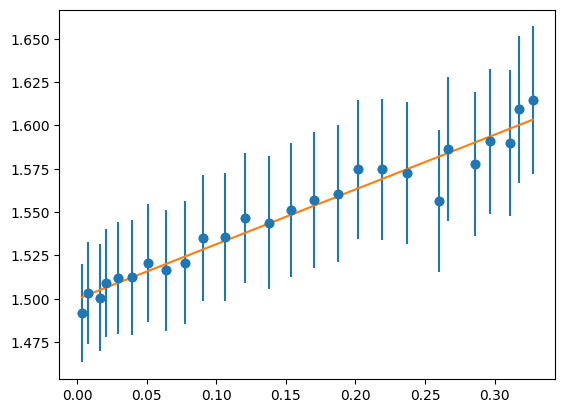

array([0.31585798, 1.49988919])

In [47]:
def func(x, a, b):
    return a*x+b

popt, pcov = curve_fit(func, cos, n, sigma=sigma_n)


plt.scatter(cos, n)
plt.errorbar(cos, n, sigma_n, fmt="o")
plt.plot(cos, func(cos, *popt))
plt.show()

popt

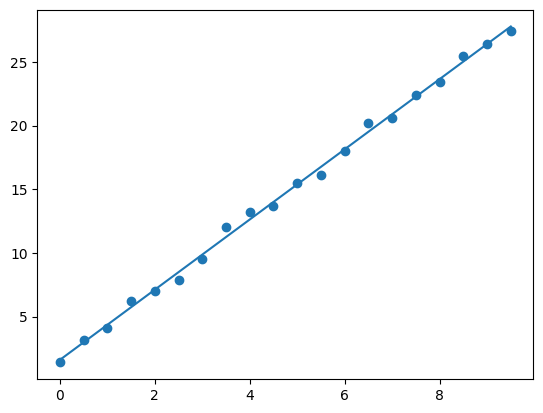

array([2.75774234, 1.59323796])

In [48]:
popt, pcov = curve_fit(func, xs, ys)


plt.scatter(xs, ys)
plt.plot(xs, func(xs, *popt))
plt.show()

popt

## **Задание 3 - Правдоподобие для гауссовой вероятностной модели**

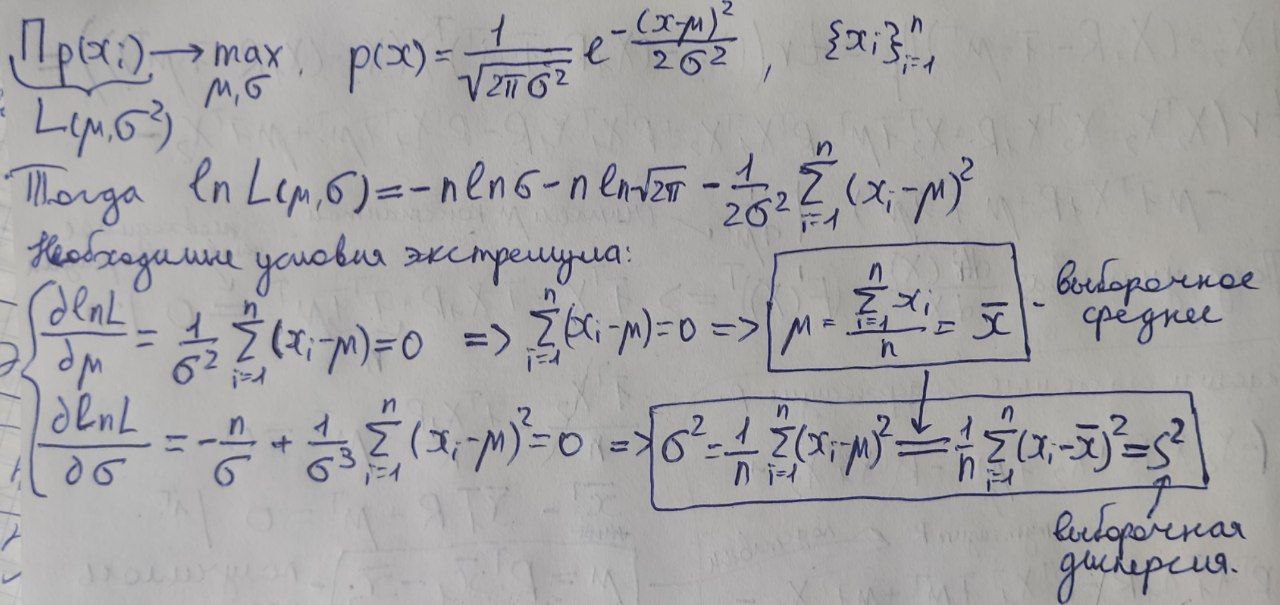

## **Задание 4 - Гауссовы интегралы для МНК**

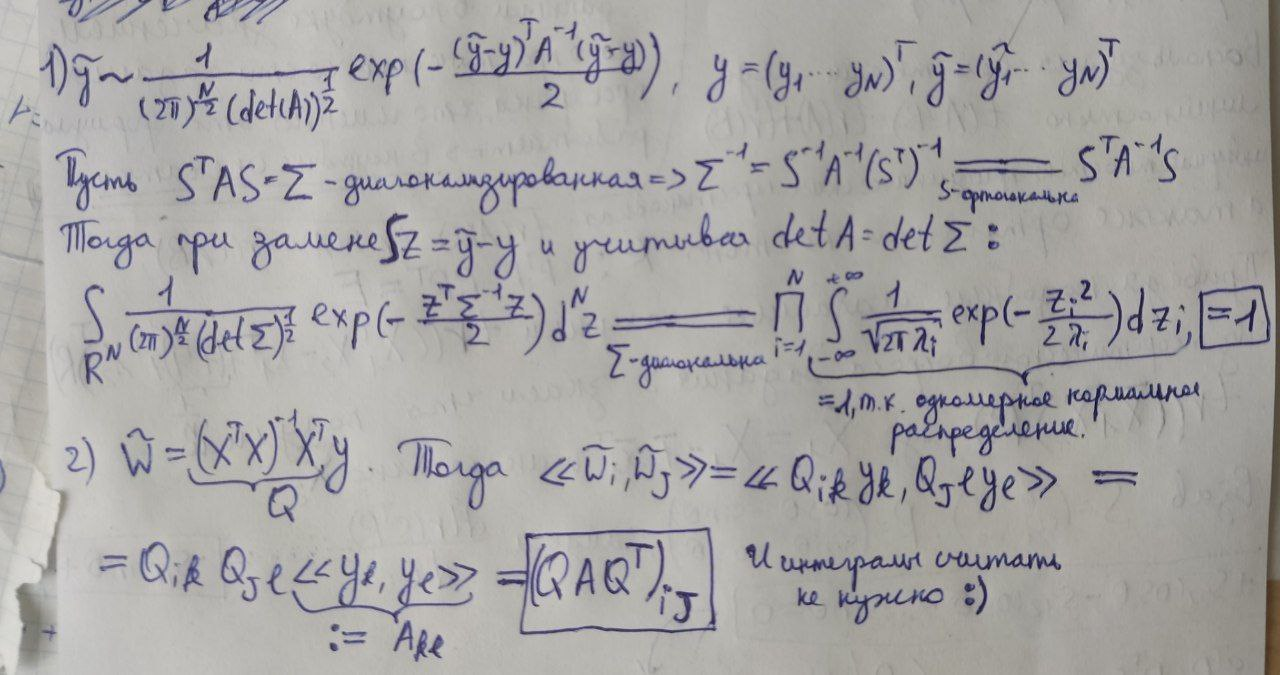

## **Задание 5 - Систематические погрешности в МНК**

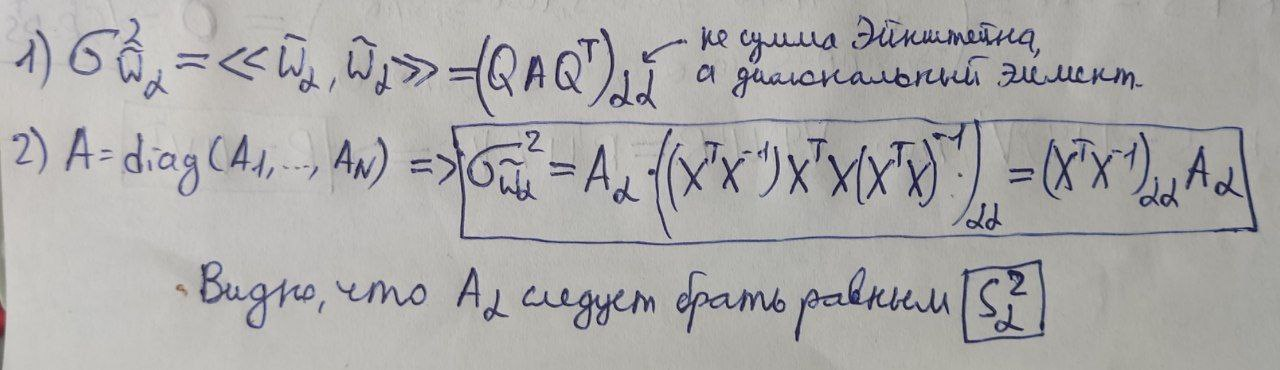